In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


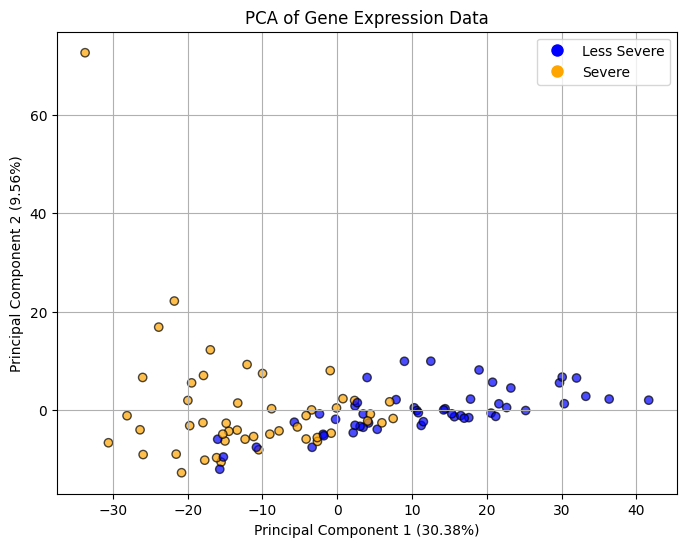

Explained variance ratios: [30.3808903   9.56497795]


In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

counts_data = pd.read_csv('/content/drive/MyDrive/thesis/manuscript/Reviewers/myDataset_numerized_severity_lfc_1_DEGs_transposed.csv')

severity = counts_data["severity"]
features = counts_data.drop(columns=["severity"])

scaler = StandardScaler()
data_normalized = scaler.fit_transform(features)

# Perform PCA
pca = PCA(n_components=2)  # Two components for visualization
pca_result = pca.fit_transform(data_normalized)

# PCA results with explained variances
plt.figure(figsize=(8, 6))
severity_colors = severity.map({0: 'blue', 1: 'orange'})  # Map severity to colors
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=severity_colors, alpha=0.7, edgecolors="k")

# Append explained variance to axis labels
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage
x_label = f"Principal Component 1 ({explained_variance[0]:.2f}%)"
y_label = f"Principal Component 2 ({explained_variance[1]:.2f}%)"

plt.xlabel(x_label)
plt.ylabel(y_label)
plt.title("PCA of Gene Expression Data")
plt.grid(True)

# legend
plt.legend(handles=[
    plt.Line2D([0], [0], marker='o', color='w', label='Less Severe', markerfacecolor='blue', markersize=10),
    plt.Line2D([0], [0], marker='o', color='w', label='Severe', markerfacecolor='orange', markersize=10)
], loc="best")

plt.show()

# explained variance ratios
print(f"Explained variance ratios: {explained_variance}")
